# Análise de dados do COVID

Os coronavírus são uma grande família de vírus comuns em muitas espécies diferentes de animais, incluindo camelos, gado, gatos e morcegos. Raramente, os coronavírus que infectam animais podem infectar pessoas, como exemplo do MERS-CoV e SARS-CoV. Recentemente, em dezembro de 2019, houve a transmissão de um novo coronavírus (SARS-CoV-2), o qual foi identificado em Wuhan na China e causou a COVID-19, sendo em seguida disseminada e transmitida pessoa a pessoa.

A COVID-19 é uma doença causada pelo coronavírus, denominado SARS-CoV-2, que apresenta um espectro clínico variando de infecções assintomáticas a quadros graves. (Fonte: coronavirus.saude.gov.br)

Nesse projeto, iremos analisar a distribuição do covid na região Sudeste, em especial no estado do Rio de Janeiro. Casos confirmados, número de mortes, mortes por estado, entre outros.
Utilizaremos uma base de dados fornecida pelo projeto Brasil.IO.
Esse dataset possui os casos relatados pelos boletins das Secretarias Estaduais de Saúde e, por isso, não possui valores para todos os municípios e todas as datas.

O Brasil.IO é um portal de dados abertos acessíveis, construído pelo programador Álvaro Justen.
A missão do portal é tornar acessíveis os dados brasileiros de interesse público, tendo como principal valor a transparência e colaboração. 
Segundo o portal, restringir acesso a dados públicos é elitizar a democracia.



---




# Importando Bibliotecas

Vamos importar algumas bibliotecas que usaremos ao longo de nossa análises:

In [111]:
import pandas as pd
import gzip
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

Vamos iniciar nossa análise salvando a base de dados na variável 'dados'.
Por ser grande, o arquivo está no formato 'gzip'. 
Vamos usar a biblioteca gzip para abrir a base de dados:

In [2]:
arquivo = gzip.open('/content/COVID19-BRASILIO-06-11-2020.csv.gz')
dados = pd.read_csv(arquivo)



Vamos verificar o tamanho do nosso dataset:

In [3]:
tamanho = dados.shape
print('Número de linhas:', tamanho[0])
print('Número de colunas:', tamanho[1])

Número de linhas: 936870
Número de colunas: 13


Nosso dataset possui um total de 936.870 observações agrupadas em 13 colunas

Vamos extrair as 5 primeiras linhas do nosso dataset para visualizarmos como estão os dados:

In [4]:
dados.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224


Vamos agora ver o nome de cada coluna e o que cada uma significa:

In [9]:
colunas = dados.columns
print('Nome das colunas:', colunas)

Nome das colunas: Index(['date', 'state', 'city', 'place_type', 'confirmed', 'deaths',
       'order_for_place', 'is_last', 'estimated_population_2019',
       'estimated_population', 'city_ibge_code',
       'confirmed_per_100k_inhabitants', 'death_rate'],
      dtype='object')




*   **'date'**: data de coleta dos dados.
*   **'state'**: sigla da unidade federativa.
*   **'city'**: nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também).
*   **'place_type'**: tipo de local que esse registro descreve, pode ser city ou state.
*   **'confirmed'**: número de casos confirmados.
*   **'deaths'**: número de mortes.
*   **'order_for_place'**: número que identifica a ordem do registro para este local.
*   **'is_last'**: campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False.
*   **'estimated_population_2019'**: população estimada para esse município/estado em 2019.
*   **'estimed_population'**: população estimada para esse município/estado em 2020.
*   **'city_ibge_code'**: código IBGE do local.
*   **'confirmed_per_100k_inhabitants'**: número de casos confirmados por 100.000 habitantes (baseado em estimated_population).
*   **'death_rate'**: taxa de mortalidade (mortes / confirmados).






Vamos verificar a data inicial e final de aquisição dos dados:

In [5]:
dados.sort_values('date', ascending=True)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
822225,2020-02-25,SP,NaN,state,1,0,1,False,45919049.0,46289333.0,35.0,0.00216,0.0000
923951,2020-02-25,SP,São Paulo,city,1,0,1,False,12252023.0,12325232.0,3550308.0,0.00811,0.0000
822224,2020-02-26,SP,NaN,state,1,0,2,False,45919049.0,46289333.0,35.0,0.00216,0.0000
923950,2020-02-26,SP,São Paulo,city,1,0,2,False,12252023.0,12325232.0,3550308.0,0.00811,0.0000
822223,2020-02-27,SP,NaN,state,1,0,3,False,45919049.0,46289333.0,35.0,0.00216,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116774,2020-11-05,BA,Iguaí,city,544,14,158,True,26916.0,26963.0,2913507.0,2017.57965,0.0257
178813,2020-11-05,MA,Bacurituba,city,69,0,176,True,5644.0,5670.0,2101350.0,1216.93122,0.0000
178989,2020-11-05,MA,Balsas,city,6530,74,200,True,94887.0,95929.0,2101400.0,6807.11776,0.0113
181225,2020-11-05,MA,Bom Lugar,city,305,3,189,True,16294.0,16438.0,2102077.0,1855.45687,0.0098


A primeira observação foi na data de 2020-02-25. Já a data final foi 2020-11-05 (essa já sabíamos, pois setamos para essa data).

Então, as observações em estudo estão entre 25 de fevereiro a 05 de novembro.

Será que há observações de uma mesma data para todos os estados da federação?

Vamos ver para a última data do nosso dataset, quantos estados possuem observações:

In [22]:
data_2020_05_11 = dados[dados['date'] == '2020-11-05']
estados_ultima_data = data_2020_05_11['state'].value_counts()
print('Estados:', estados_ultima_data.count())
estados_ultima_data

Estados: 22


SP    647
RS    499
BA    419
GO    248
PI    225
MA    218
CE    186
PA    146
SE     76
AC     23
MG      1
PR      1
RJ      1
RO      1
ES      1
DF      1
SC      1
PB      1
MT      1
AL      1
PE      1
AM      1
Name: state, dtype: int64

Temos ao todo, para o dia 05/11, observações de 22 estados.

Para facilitar nossas análises, vamos agrupar os estados por região.

Para isso, vamos criar uma nova coluna com as regiões do Brasil e então agrupar os estados por região:

In [56]:
regiao = []
for estado in dados['state']:
  if estado == 'RJ':
    regiao.append('Sudeste')
  if estado == 'SP':
    regiao.append('Sudeste')
  if estado == 'MG':
    regiao.append('Sudeste')
  if estado == 'ES':
    regiao.append('Sudeste')
  if estado == 'RS':
    regiao.append('Sul')
  if estado == 'PR':
    regiao.append('Sul')
  if estado == 'SC':
    regiao.append('Sul')
  if estado ==  'MS':
    regiao.append('Centro Oeste')
  if estado == 'MT':
    regiao.append('Centro Oeste')
  if estado == 'GO':
    regiao.append('Centro Oeste')
  if estado == 'DF':
    regiao.append('Centro Oeste')
  if estado == 'AP':
    regiao.append('Norte')
  if estado == 'RO':
    regiao.append('Norte')
  if estado == 'RR':
    regiao.append('Norte')
  if estado == 'AC':
    regiao.append('Norte')
  if estado == 'AM':
    regiao.append('Norte')
  if estado == 'TO':
    regiao.append('Norte')
  if estado == 'PA':
    regiao.append('Norte')
  if estado == 'MA':
    regiao.append('Nordeste')
  if estado == 'BA':
    regiao.append('Nordeste')
  if estado == 'AL':
    regiao.append('Nordeste')
  if estado == 'PI':
    regiao.append('Nordeste')
  if estado == 'PB':
    regiao.append('Nordeste')
  if estado == 'SE':
    regiao.append('Nordeste')
  if estado == 'PE':
    regiao.append('Nordeste')
  if estado == 'RN':
    regiao.append('Nordeste')
  if estado == 'CE':
    regiao.append('Nordeste')



In [58]:
dados.insert(1, 'regiao', value=regiao)

Vamos verificar se a coluna 'regiao' foi inserida:

In [60]:
dados.head()

,date,regiao,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,Norte,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,Norte,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,Norte,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
3,2020-11-02,Norte,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
4,2020-11-01,Norte,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224


Coluna inserida com sucesso, vamos agora agrupar os estados por região:

In [63]:
regioes = dados.groupby('regiao')

Pronto! Com os dados agrupados por região, fica mais fácil realizar certas análises.
Vamos definir uma variável para a região sudeste:

In [72]:
sudeste = regioes.get_group('Sudeste')
sudeste.head()

,date,regiao,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
76251,2020-11-05,Sudeste,ES,NaN,state,159813,3896,245,True,4018650.0,4064052.0,32.0,3932.35618,0.0244
76252,2020-11-04,Sudeste,ES,NaN,state,158768,3884,244,False,4018650.0,4064052.0,32.0,3906.64293,0.0245
76253,2020-11-03,Sudeste,ES,NaN,state,157750,3876,243,False,4018650.0,4064052.0,32.0,3881.59403,0.0246
76254,2020-11-02,Sudeste,ES,NaN,state,156681,3863,242,False,4018650.0,4064052.0,32.0,3855.29024,0.0247
76255,2020-11-01,Sudeste,ES,NaN,state,156018,3862,241,False,4018650.0,4064052.0,32.0,3838.97647,0.0248


Vamos plotar um gráfico de barras para analisar a distribuição dos dados da coluna 'confirmed' (confirmados):

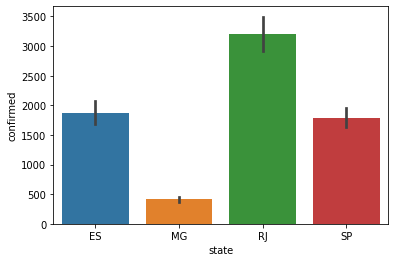

In [73]:
ax = sns.barplot(x = 'state', y = 'confirmed', data=sudeste)

Humm.. estranho. Apenas em torno de 3000 confirmados para o estado do RJ? 
Entre fevereiro e novembro?
Vamos filtrar apenas ps dados do estado do RJ:

In [83]:
sudeste[sudeste['state'] == 'RJ']

,date,regiao,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
548128,2020-11-05,Sudeste,RJ,NaN,state,313843,20849,236,True,17264943.0,17366189.0,33.0,1807.20710,0.0664
548129,2020-11-04,Sudeste,RJ,NaN,state,313089,20759,235,False,17264943.0,17366189.0,33.0,1802.86533,0.0663
548130,2020-11-03,Sudeste,RJ,NaN,state,313089,20651,234,False,17264943.0,17366189.0,33.0,1802.86533,0.0660
548131,2020-11-02,Sudeste,RJ,NaN,state,311308,20636,233,False,17264943.0,17366189.0,33.0,1792.60977,0.0663
548132,2020-11-01,Sudeste,RJ,NaN,state,311014,20611,232,False,17264943.0,17366189.0,33.0,1790.91682,0.0663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566769,2020-03-28,Sudeste,RJ,Volta Redonda,city,11,1,5,False,273012.0,273988.0,3306305.0,4.01477,0.0909
566770,2020-03-27,Sudeste,RJ,Volta Redonda,city,9,1,4,False,273012.0,273988.0,3306305.0,3.28482,0.1111
566771,2020-03-26,Sudeste,RJ,Volta Redonda,city,7,0,3,False,273012.0,273988.0,3306305.0,2.55486,0.0000
566772,2020-03-25,Sudeste,RJ,Volta Redonda,city,6,0,2,False,273012.0,273988.0,3306305.0,2.18988,0.0000


Olhando a tabela acima com os resultados apenas do RJ, vemos o que aconteceu. 

Os resultados, são cumulativos, mostrando dia após dia. 

Por exemplo, no dia 01/11 o número de confirmados era de 311.014, já no dia 02/11 311.308.

Para sabermos o número de casos confirmados, basta olharmos o último dia do dataset para cada estado e, então, obteremos o número total de casos confirmados. 

O mesmo se aplica para a coluna deaths.

Então vamos ver o valor máximo de confirmados de cada estado, agrupar e plotar:

In [95]:
sp = sudeste.query("state == 'SP'").nlargest(1, 'confirmed')
rj = sudeste.query("state == 'RJ'").nlargest(1, 'confirmed')
es = sudeste.query("state == 'ES'").nlargest(1, 'confirmed')
mg = sudeste.query("state == 'MG'").nlargest(1, 'confirmed')

In [109]:
estados_maximos = sudeste.loc[[821973,548128,409347,76251]]

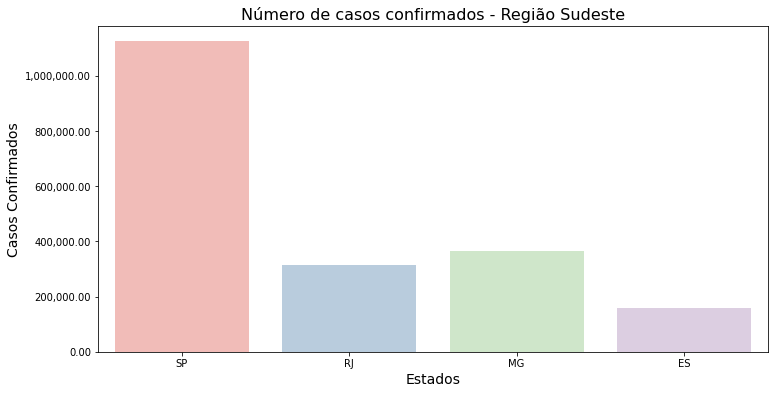

In [115]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='state', y='confirmed', data=estados_maximos, palette='Pastel1')
ax.set_title('Número de casos confirmados - Região Sudeste', fontsize=16)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Estados', fontsize=14 )
ax.set_ylabel('Casos Confirmados', fontsize=14)
plt.show()

Agora sim! Temos o valor real de casos confirmados por estado da região sudeste.

Vemos claramente que a maior quantidade casos confirmados é do estado de São Paulo, com mais de 1.000.000 de casos, seguido por Minas Gerais.

Vamos fazer o mesmo para o número de mortes:

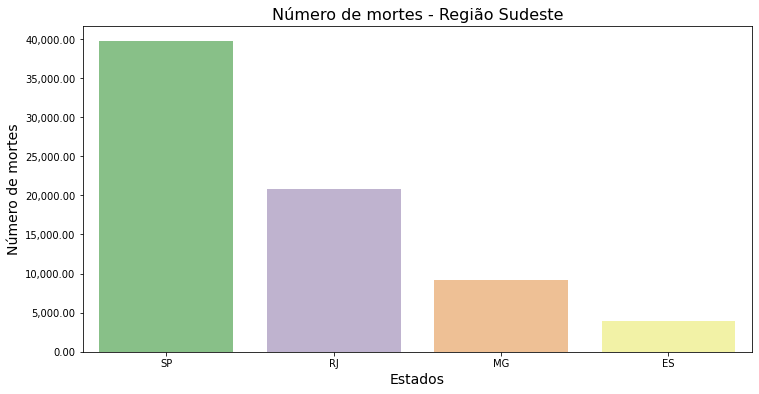

In [119]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='state', y='deaths', data=estados_maximos, palette='Accent')
ax.set_title('Número de mortes - Região Sudeste', fontsize=16)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Estados', fontsize=14 )
ax.set_ylabel('Número de mortes', fontsize=14)
plt.show()

In [174]:
evolucao_RJ = sudeste.query("state == 'RJ' and place_type == 'state'").sort_values('date', ascending=True)

O estado com o maior número de mortes foi o estado de São Paulo, com quase 40.000 mortes, seguido pelo Rio de Janeiro.


Interessante, pois o segundo estado com maior número de casos foi o estado de Minas. Era de se esperar que fosse o segundo maior em número de mortes também. Porém o que ocorre é que o Rio de Janeiro, o terceiro com maior número de casos confirmados é o segundo com maior número de mortes.

Fica a pergunta aos cariocas do porque isso acontece.
Má gestão da saúde? Falta de leitos? Desvio do dinheiro destinado aos hospitais de campanha?

Vamos ver graficamente a evolução do número de mortes do estado do Rio de Janeiro:

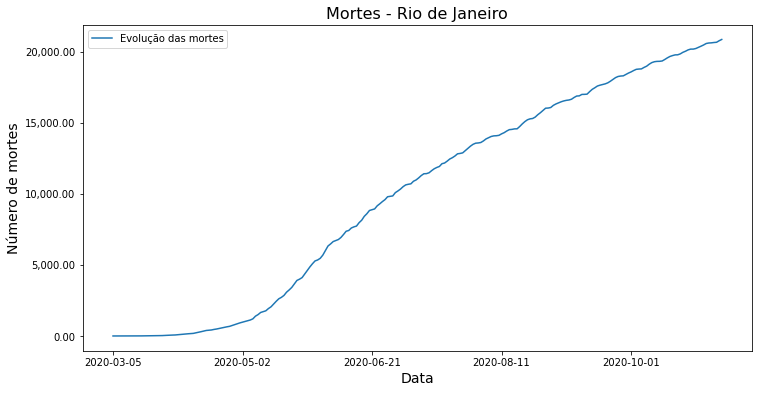

In [183]:
ax = evolucao_RJ.plot(x='date', y='deaths', figsize=(12,6), label='Evolução das mortes')
ax.set_title('Mortes - Rio de Janeiro', fontsize=16)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Data', fontsize=14 )
ax.set_ylabel('Número de mortes', fontsize=14)
ax.legend()
plt.show()



# Análise de sintomáticos e assintomáticos do estado do Rio de Janeiro

Vamos analisar um dataset agora que contém sintomas de aproximadamente 10.000 pessoas (trabalhadores da indústria), com a classificação de positivo ou negativo. Essas pessoas foram submetidas ao teste para detecção de covid, RT-qPCR.
O dataset foi cedido pela Firjan, que atualmente tem trabalhado na testagem e mapeamento dos trabalhadores da indústria do estado do Rio de Janeiro

A técnica de reação de cadeia da polimerase em tempo real
com transcrição reversa (RT-qPCR) é a técnica considerada
padrão ouro pela Organização Mundial da Saúde para a
detecção do novo coronavírus (SARS-CoV-2) causador da
COVID-19. A detecção é realizada através da presença de
ácidos nucleicos do patógeno pelo uso de primers e sondas
(oligonucleotídeos marcados com fluorescência) específicos
para cada alvo molecular.

O teste realizado pela Firjan SESI é feito a partir da coleta de secreção da garganta e das narinas, sem procedimento invasivo, de fácil coleta e com capacidade de identificação do vírus antes mesmo do aparecimento dos sintomas.



---



In [124]:
dados_covid = pd.read_excel('/content/Fichas Saude - Planilha Geral (1).xlsx', sheet_name='Dados das Fichas de Saúde')
dados_covid.drop(['Grupo', 'CNAE', 'Empresa'], axis=1, inplace=True)
##Algumas colunas foram omitidas devido ao sigilo das informações

Vamos analisar as 5 primeiras linhas do dataset:

In [162]:
dados_covid.head()

,Data,Código,Sexo,Idade,Local de Coleta,Febre -3,Febre +3,Cansaço-3,Cansaço+3,Tosse-3,Tosse+3,Cabeça -3,Cabeça +3,Corpo-3,Corpo+3,Garganta-3,Garganta+3,Nauseas-3,Nauseas+3,Vômito-3,Vômito+3,Diarreia-3,Diarreia+3,Ar-3,Ar+3,Azul-3,Azul+3,Assintomático,Gravidez,Pressão,Diabetes,Pulmão,Terapia,Corticoides,Fumante,Renal,Autoimune,Sem doença,Teste,Grupo de Sintomas,PORTE (>100 FUNC?),RETESTE,PRIMEIRO VÁLIDO?,RETESTE MUDOU?
0,2020-04-11,2020004009A,F,32,RJ1,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Negativo,Nao,Nao,Nao,-,-
1,2020-04-11,202004008A,F,37,RJ1,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Negativo,Nao,Nao,Nao,-,-
2,2020-04-11,202004110002A,F,44,RJ1,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Negativo,Nao,Nao,Nao,-,-
3,2020-04-11,20200411003A,F,30,RJ1,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Negativo,Sim,Nao,Nao,-,-
4,2020-04-11,20200411004A,F,45,RJ1,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Sim,Nao,Sim,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Nao,Negativo,Nao,Nao,Nao,-,-


As colunas representam sintomas que o paciente teve. Como por exemplo: cansaço com menos de 3 dias e cansaço com mais de 3 dias, dor de garganta com menos de 3 dias, e dor de garganta com mais de 3 dias.

Assim como possui uma coluna denominada 'Assintomáticos' que refere-se a pessoas que fizeram o teste e não possuem sintoma algum. 
No final, há a coluna 'TESTE' que mostra o resultado do teste.

Vamos analisar o número de testes realizados:

In [365]:
shape = dados_covid.shape
print('Número de testes:', shape[0])

Número de testes: 9807


Número esse que não condiz com o número de pessoas, pois em alguns casos, houve reteste.

Vamos verificar o se houveram muitos retestes:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x432 with 0 Axes>

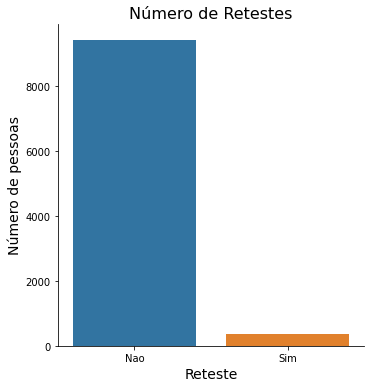

In [366]:
plt.figure(figsize=(10,6))
ax = sns.catplot('RETESTE', kind='count', data=dados_covid)
plt.title('Número de Retestes', fontsize=16)

plt.xlabel('Reteste', fontsize=14 )
plt.ylabel('Número de pessoas', fontsize=14)
plt.show()

Poucos retestes realizados.

Um reteste é realizado quando há dúvidas com relação ao resultado do teste. 

Caso haja dúvidas, analisa-se a amostra do paciente novamente. 
Se ainda assim houver dúvidas, faz-se necessário colher outra amostra do paciente.

Vamos ver agora a distribuição das idades das pessoas que fizeram o teste:

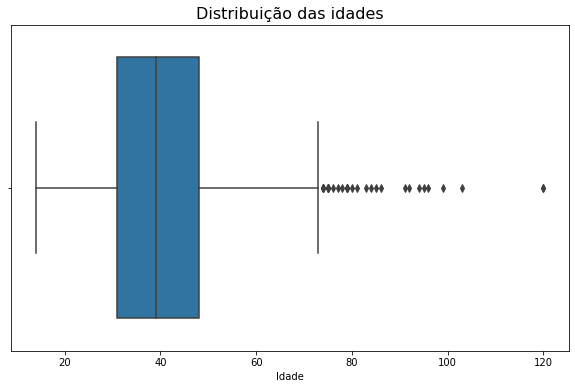

In [367]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Idade', data=dados_covid)
plt.title('Distribuição das idades', fontsize=16)
plt.show()

No geral, as idades concentram-se um pouco abaixo de 20 e até os 70, com maior distribuição entre 30 a 50 anos. 
No meio da distribuição há idades de 100 e 120 anos, tidas como outliers nessa distribuição.

Será que foi um erro de digitação na planilha, ou realmente alguém de 120 anos fez o teste? hahaha

Vamos ver a distribuição do sexo das pessoas que foram testadas:

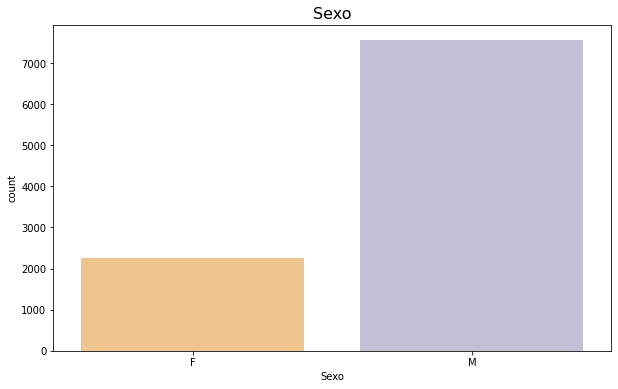

In [330]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sexo', data=dados_covid, palette='PuOr')
plt.title('Sexo', fontsize=16)
plt.show()

Distribuição maior do sexo masculino, acima de 7000 homens testados.

Na planilha há uma coluna chamada 'Assintomatico', que mostra as pessoas que não tiveram nenhum sintoma. Podendo ou não ter testado positivo. 

Vamos ver o número de assintomáticos:


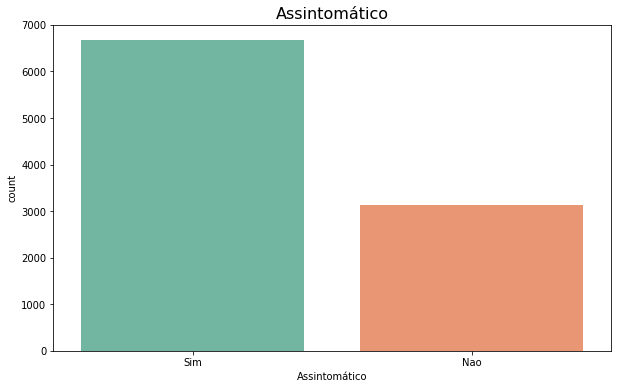

In [340]:
plt.figure(figsize=(10,6))
sns.countplot(x='Assintomático', data=dados_covid, palette='Set2')
plt.title('Assintomático', fontsize=16)
plt.show()

A maior parte das pessoas testadas, não apresentaram nenhum dos sintomas listados na planilha.

Vamos verificar se essas pessoas testaram positivo ou negativo.
Primeiro, vamos ver o número de positivos e negativos:

In [341]:
dados_covid['Teste'].value_counts()

Negativo    9064
Positivo     743
Name: Teste, dtype: int64

Temos bem mais resultados negativos que positivos. Vamos ver agora se esses positivos são em sua maior parte sintomáticos ou assintomáticos:

In [ ]:
positivos_assin = dados_covid.query("Assintomático == 'Sim' and Teste == 'Positivo'")
positivos_assin

In [352]:
n = positivos_assin['Teste'].count()
print('Número de pessoas positivas sem sintomas:', n)

Número de pessoas positivas sem sintomas: 368


Quase metade das pessoas que testaram positivo (743), não apresentaram sintomas nenhum. Ou seja, mesmo sem sintomas, estão positivas, podendo contaminar outras pessoas. Por isso, a importância de se usar máscara!
Usar máscara é uma responsabilidade social!

Para finalizar o nosso projeto, vamos ver dentre os positivos, qual o sexo predominante:

In [356]:
positivos = dados_covid[dados_covid['Teste'] == 'Positivo']
positivos_sexo = positivos['Sexo'].value_counts()
positivos_sexo


M    633
F    110
Name: Sexo, dtype: int64

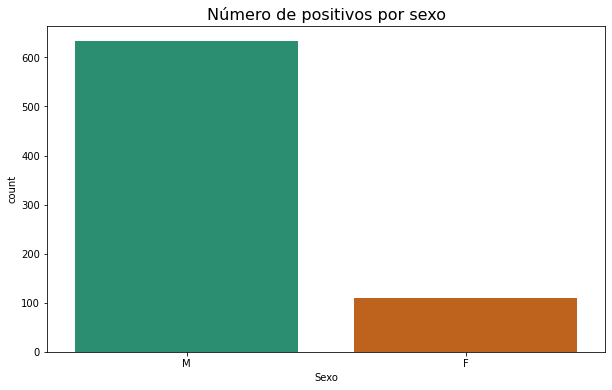

In [364]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sexo', data=positivos, palette='Dark2')
plt.title('Número de positivos por sexo', fontsize=16)
plt.show()

Mais da metade dos que testaram positivo (bem mais) são do sexo masculino.

# Conclusão

Utilizamos a base de dados do Brasil.IO, que visa democratizar o acesso aos dados. Vimos os dados do covid-19 da região sudeste, com foco no estado do Rio de Janeiro. 

O Rio de Janeiro, que é um estado pequeno, ficou em segundo lugar da região sudeste como estado com maior número de mortes, sendo que ficou em terceiro lugar com casos confirmados. Em segundo lugar ficou o estado de Minas Gerais.

E aí, refaço a pergunta: como pode o estado ser o terceiro com número de casos confrmados, sendo que Minas estava bem na frente e ainda assim o Rio ficar em segundo no quesito mortes?

Fica a reflexão para os cariocas e para todos àqueles que lerem este projeto.